# Unit 5 - Financial Planning

In [128]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [129]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [130]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [131]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [132]:
# Fetch current BTC price
requests.get(btc_url)
response_btc_data = requests.get(btc_url)
response_btc_content = response_btc_data.content 

#print(response_btc_content)
import json
btc_data = response_btc_data.json()
##print(json.dumps(btc_data, indent=4))
my_btc_value = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
#print(my_btc_value)

# Fetch current ETH price
requests.get(eth_url)
response_eth_data = requests.get(eth_url)
response_eth_content = response_eth_data.content 
eth_data = response_eth_data.json()
##print(json.dumps(eth_data, indent=4))
my_eth_value = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
#print(my_eth_value)

# Compute current value of my crpto
print(f"Current value of my crypto is" + " $" + str(my_eth_value + my_btc_value))
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

Current value of my crypto is $47013.809058
The current value of your 1.2 BTC is $44341.30
The current value of your 5.3 ETH is $2672.51


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [133]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [134]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [135]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# (use a limit=1000 parameter to call the most recent 1000 days of data)
start = pd.Timestamp("2018-09-18", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-06-14", tz="America/New_York").isoformat()

df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df


# Preview DataFrame
df_portfolio_year

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2018-09-18 00:00:00-04:00  105.59  105.60  105.3900  105.430  2194556  289.57   
2018-09-19 00:00:00-04:00  105.42  105.43  105.2200  105.270  2605609  290.97   
2018-09-20 00:00:00-04:00  105.23  105.45  105.2300  105.370  2627111  292.64   
2018-09-21 00:00:00-04:00  105.34  105.47  105.3232  105.465  2420806  293.09   
2018-09-24 00:00:00-04:00  105.33  105.46  105.3101  105.350  1771301  291.34   
...                           ...     ...       ...      ...      ...     ...   
2021-06-08 00:00:00-04:00  114.84  114.87  114.7800  114.820  3951702  423.11   
2021-06-09 00:00:00-04:00  115.43  115.43  114.9700  115.050  3418086  423.18   
2021-06-10 00:00:00-04:00  115.30  115.31  114.8605  115.300  3665934  422.96   
2021-06-11 00:00:00-04:00  115.31  115.32  115.1600  115.240  3476373  424.19   
2021-06-14 00:00:00-04:00  115.18  115.18  114.9350  114.970  2999623  424.43   

                                                              
                             high      low   close    volume  
time                                                          
2018-09-18 00:00:00-04:00  291.58  289.550  290.90  38573521  
2018-09-19 00:00:00-04:00  291.69  290.825  291.25  34596543  
2018-09-20 00:00:00-04:00  293.94  292.510  293.55  54097569  
2018-09-21 00:00:00-04:00  293.22  291.810  292.01  45805544  
2018-09-24 00:00:00-04:00  291.50  290.370  291.07  37585070  
...                           ...      ...     ...       ...  
2021-06-08 00:00:00-04:00  423.21  420.320  422.27  40131441  
2021-06-09 00:00:00-04:00  423.26  421.410  421.62  38368598  
2021-06-10 00:00:00-04:00  424.63  421.550  423.58  43577329  
2021-06-11 00:00:00-04:00  424.42  422.820  424.31  37018077  
2021-06-14 00:00:00-04:00  425.29  423.100  425.29  33128340  

[689 rows x 10 columns]

In [136]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio_year.iloc[-1]["AGG"]["close"]
spy_close_price = df_portfolio_year.iloc[-1]["SPY"]["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.97
Current SPY closing price: $425.29


In [137]:
# Compute the current value of shares
my_spy_value = agg_close_price * my_agg
my_agg_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22994.00
The current value of your 200 AGG shares is $21264.50


### Savings Health Analysis

In [138]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_eth_value + my_btc_value
shares_value = my_spy_value + my_agg_value
savings_dict = {'crypto' : crypto_value, 'shares' : shares_value}

# Create savings DataFrame
df_savings = pd.DataFrame.from_dict(savings_dict, orient='index')
df_savings.columns = ['amount']

# Display savings DataFrame
display(df_savings)

,amount
crypto,47013.809058
shares,44258.500000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

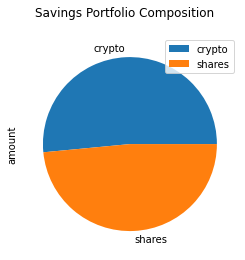

In [139]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, title="Savings Portfolio Composition")

In [140]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(savings_dict.values())
print(f'Total amount of savings: ${total_savings}')

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations you have enough money in this fund')
elif total_savings == emergency_fund:
    print(f'Congratulations on reaching your financial goal')
elif total_savings < emergency_fund:
    print(f'You are ${total_savings - emergency_fund} away from your goal')

Total amount of savings: $91272.309058
Congratulations you have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [149]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [150]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [151]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [152]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [153]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012372,0.996163,0.996662,1.004910,1.000756,0.990058,1.009772,1.010494,1.003165,0.986789,...,1.010733,0.999641,0.995238,1.010398,1.001285,1.002792,1.006298,1.004761,1.008103,1.004543
2,1.013034,0.992325,0.990389,1.016693,1.008315,0.981966,1.019769,1.002502,1.002865,0.978002,...,1.022518,0.997757,1.001362,1.016456,0.996094,1.014110,1.001394,1.005678,1.009372,1.011123
3,1.003639,0.993739,1.004910,1.010348,0.996008,0.984363,1.015649,1.017509,1.009038,0.987312,...,1.017031,1.003958,1.011823,1.031822,1.019748,1.021069,1.002089,1.001809,1.002960,1.031874
4,1.001687,1.014606,1.006839,1.022723,1.001659,0.982438,1.016288,1.013083,1.003934,0.993002,...,1.014748,1.004220,1.009558,1.044512,1.019183,1.010669,1.010443,0.995236,1.000481,1.050514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.443613,8.099914,6.030810,15.467176,23.801566,5.494588,52.986173,18.811436,9.335008,12.568102,...,15.393697,7.806944,62.494979,14.731683,28.247783,34.960523,10.217728,24.637946,13.782388,23.827484
7557,12.528312,7.965482,6.053465,15.581033,23.790777,5.510831,52.572067,18.859352,9.206905,12.504978,...,15.373588,7.829454,62.079901,14.578834,28.133879,35.392360,10.388389,24.443723,13.882011,23.897514
7558,12.405079,8.125987,6.065491,15.499728,24.442200,5.558624,52.225732,18.990602,9.079847,12.667295,...,15.213134,7.774191,61.826768,14.694132,28.058447,34.893706,10.384560,24.789381,13.780045,23.888803
7559,12.334469,8.168209,6.195225,15.516534,24.608462,5.590535,52.510069,18.930827,8.968903,12.696397,...,15.198127,7.831238,62.227869,14.746863,28.220494,34.763628,10.370528,24.850880,13.708482,23.861726


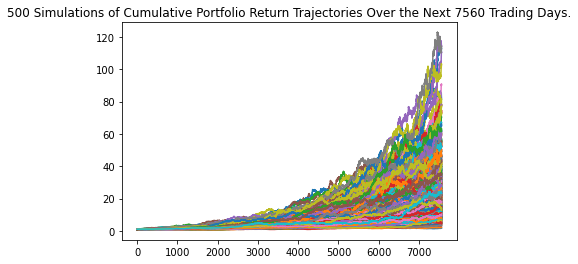

In [154]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

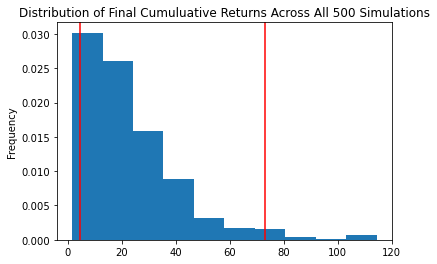

In [155]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [156]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             23.612964
std              18.210517
min               1.682213
25%              10.702824
50%              18.499616
75%              31.243892
max             114.378777
95% CI Lower      4.628890
95% CI Upper     73.113144
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [160]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(initial_investment * tbl[8], 2)
ci_upper = round(initial_investment * tbl[9], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92577.8 and $1462262.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [161]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(initial_investment * tbl[8], 2)
ci_upper = round(initial_investment * tbl[9], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138866.69 and $2193394.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [162]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
#Higher risk portfolio with 80% stocks and 20% bonds
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [163]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986364,1.022461,1.010722,1.012208,0.997556,0.997778,0.989200,0.992556,0.994708,1.003344,...,0.993546,1.015244,0.996426,0.992694,0.997880,0.989392,1.012256,1.008488,1.008508,0.999526
2,1.000265,1.019244,0.996107,1.008272,0.984547,1.012384,1.000755,0.985951,0.998874,1.003091,...,0.981049,1.020958,0.986926,0.985560,0.994041,0.974373,1.017338,1.028957,1.009762,0.991659
3,1.028061,1.023804,0.982344,1.015354,0.984114,1.004900,1.000976,0.974646,1.015782,1.008399,...,0.980410,1.010130,0.992226,0.994910,0.986969,0.960467,1.038311,1.036505,1.019266,1.006037
4,1.036684,1.015774,0.999670,1.035740,0.971692,1.005974,0.992391,0.967270,1.005992,0.996565,...,0.972469,1.022165,0.991213,0.988392,0.999687,0.947474,1.033854,1.041661,1.020680,1.022953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.298975,1.538743,1.786333,0.993465,0.952459,1.382990,1.650225,2.552408,1.870872,1.765459,...,3.276142,1.592750,2.646510,1.571344,1.183218,2.363716,1.336408,1.633938,2.850983,1.525699
1257,3.310585,1.552575,1.809543,0.988497,0.970306,1.370968,1.644824,2.538909,1.863784,1.744554,...,3.316630,1.586953,2.629437,1.536166,1.163934,2.365965,1.329031,1.622540,2.831210,1.531405
1258,3.304307,1.547803,1.803862,0.986161,0.976139,1.374791,1.662088,2.537867,1.857935,1.752794,...,3.324563,1.575662,2.650034,1.562941,1.170742,2.379742,1.340163,1.625283,2.784934,1.558023
1259,3.275230,1.538344,1.829174,0.987786,0.991409,1.337954,1.656059,2.502531,1.866415,1.749955,...,3.326838,1.571573,2.605249,1.571285,1.150899,2.352335,1.338608,1.610688,2.792947,1.539116


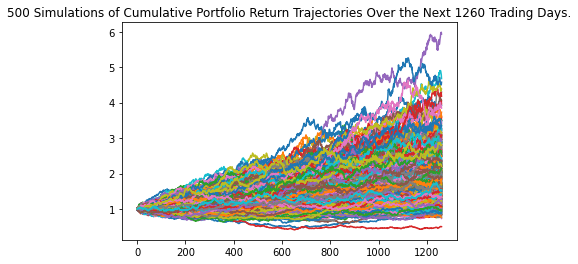

In [164]:
# Plot simulation outcomes
line_plot_retirement = MC_fiveyear.plot_simulation()

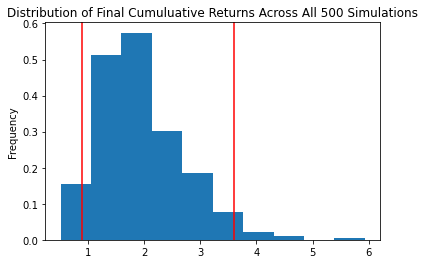

In [165]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

In [166]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)


count           500.000000
mean              1.939065
std               0.750568
min               0.502666
25%               1.400451
50%               1.800768
75%               2.350405
max               5.934577
95% CI Lower      0.880845
95% CI Upper      3.598258
Name: 1260, dtype: float64


In [168]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(initial_investment * tbl_five[8], 2)
ci_upper_five = round(initial_investment * tbl_five[9], 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17616.9 and $71965.16


### Ten Years Retirement Option

In [169]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [170]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011152,0.992461,0.982917,0.988407,0.995975,0.997359,1.004579,0.998563,0.999717,1.009781,...,1.022346,0.996165,0.990713,1.014878,0.997611,1.001675,0.983693,0.991694,0.998264,1.001352
2,1.016184,0.997812,0.993701,0.988522,0.988959,1.002522,0.999672,0.984151,1.004585,1.012881,...,1.017907,0.982354,0.993888,1.003174,1.008344,1.015096,0.980277,0.968672,0.976124,1.018104
3,1.001400,1.000102,0.997417,1.010812,0.994988,0.989088,1.000100,0.978292,1.007762,0.998324,...,1.026238,0.994413,0.993145,1.004238,1.002173,1.025212,0.977255,0.966461,0.969223,1.014604
4,0.977177,1.006290,0.997093,1.005912,0.980159,0.984910,0.998683,0.980815,1.018472,1.001545,...,1.024904,0.995369,0.990009,0.991759,0.996304,1.017325,0.974444,0.974181,0.968918,1.024066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.095228,6.336123,3.100680,1.816206,1.453967,2.893774,4.517910,4.692617,10.676113,3.761231,...,2.886494,5.488517,2.962929,6.790939,1.694450,2.003692,4.795882,6.889362,3.005633,2.531311
2517,5.069836,6.437851,3.174614,1.833114,1.449502,2.894321,4.524696,4.733415,10.749743,3.713178,...,2.837855,5.429912,2.971412,6.676468,1.696375,2.050216,4.803208,6.847273,2.999926,2.490667
2518,5.135246,6.420831,3.205104,1.833196,1.459314,2.902310,4.578777,4.742428,10.888771,3.849074,...,2.832207,5.425306,2.943451,6.742631,1.705996,2.017241,4.878053,6.805022,2.972431,2.477417
2519,5.152979,6.388746,3.210041,1.812273,1.485303,2.912564,4.613763,4.809243,10.786596,3.901542,...,2.865203,5.480255,2.929968,6.797344,1.708332,2.007841,4.935253,6.809533,2.966994,2.462588


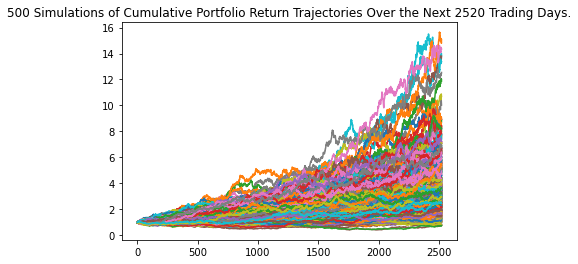

In [171]:
# Plot simulation outcomes
line_plot_retirement = MC_tenyear.plot_simulation()

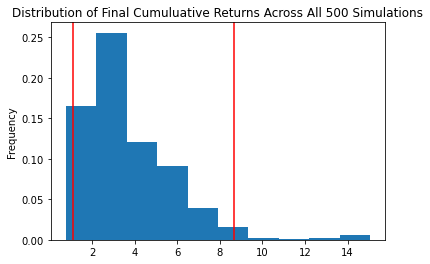

In [172]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_tenyear.plot_distribution()

In [173]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              3.717271
std               2.179545
min               0.747986
25%               2.232874
50%               3.139224
75%               4.881481
max              15.065356
95% CI Lower      1.103610
95% CI Upper      8.639630
Name: 2520, dtype: float64


In [174]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(initial_investment * tbl_ten[8], 2)
ci_upper_ten = round(initial_investment * tbl_ten[9], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $22072.2 and $172792.59
